In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,SCORERS
import seaborn as sns
from sklearn.model_selection import cross_validate
import os

In [2]:
from modules.LR import LR
from modules.knn import KNN
from modules.GNB import GNB

In [3]:
def svm_cross_validate(X,y):
    cv2 = cross_validate(estimator=SVC(kernel='rbf'),X=X,y=y,cv=5,scoring=['accuracy','precision_macro','recall_macro','f1_macro'],return_estimator=True,)
    result ={}
    result['accuracy'] = cv2['test_accuracy'].mean()
    result['precision'] = cv2['test_precision_macro'].mean()
    result['recall'] = cv2['test_recall_macro'].mean()
    result['f1'] = cv2['test_f1_macro'].mean()
    return result

In [4]:
def get_metrics(X,y,exp_no):
    best_k = [7,6,7,3,2,4]
    result = []
    LogisticRegression = LR()
    knn = KNN()
    gnb = GNB()
    result.append(LogisticRegression.cross_valid(X,y))
    result.append(svm_cross_validate(X,y))
    result.append(knn.cross_validate(pd.DataFrame(X),y,best_k[1-exp_no]))
    result.append(gnb.cross_valid(X,y))
    return pd.DataFrame(result, index=['LR','SVM','KNN','GNB'])
    

# Glioblastoma vs Astrocytoma vs Oligodendroglioma

In [5]:
#Make output Directory
os.system("mkdir ./output/GvsAvsO")

mkdir: ./output/GvsAvsO: File exists


256

In [6]:
X = pd.read_csv("./output/data_preprocessing/GvsAvsO/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAvsO/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

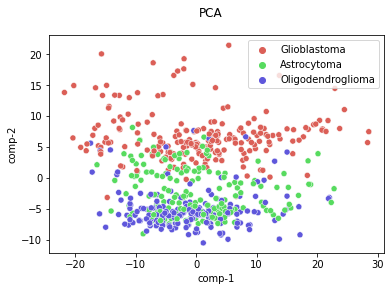

In [7]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAvsO/pca.png")

In [8]:
pca.explained_variance_ratio_.sum()

0.9005547835198963

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 575 samples in 0.000s...
[t-SNE] Computed neighbors for 575 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 575 / 575
[t-SNE] Mean sigma: 4.893398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.855171
[t-SNE] KL divergence after 1000 iterations: 0.742975


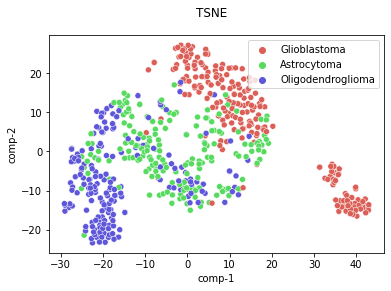

In [9]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsO/tsne.png")


In [10]:
X = X_pca
result = get_metrics(X,y,1)
result.to_csv("./output/GvsAvsO/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.840000,0.677255,0.667978,0.670142
SVM,0.862609,0.873143,0.858370,0.856480
KNN,0.817391,0.694939,0.684229,0.683754
GNB,0.309565,0.346654,0.277812,0.279800


# Glioblastoma vs (A + O)

In [11]:
#Make output Directory
os.system("mkdir ./output/GvsAO")

mkdir: ./output/GvsAO: File exists


256

In [12]:
X = pd.read_csv("./output/data_preprocessing/GvsAO/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAO/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

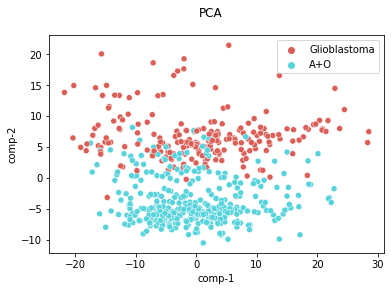

In [13]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAO/pca.png")

In [14]:
pca.explained_variance_ratio_.sum()

0.9005808954806473

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 575 samples in 0.000s...
[t-SNE] Computed neighbors for 575 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 575 / 575
[t-SNE] Mean sigma: 4.893759
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.520287
[t-SNE] KL divergence after 1000 iterations: 0.736950


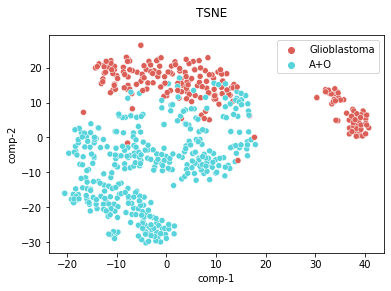

In [15]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAO/tsne.png")

In [16]:
X = X_pca
result = get_metrics(X,y,2)
result.to_csv("./output/GvsAO/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.965217,0.770101,0.769808,0.769433
SVM,0.956522,0.956566,0.949497,0.952393
KNN,0.907826,0.723927,0.736345,0.725036
GNB,0.493913,0.487515,0.358365,0.376970


# Glioblastoma vs Astrocytoma vs Oligodendroglioma vs Normal

In [17]:
#Make output Directory
os.system("mkdir ./output/GvsAvsOvsN")

mkdir: ./output/GvsAvsOvsN: File exists


256

In [18]:
X = pd.read_csv("./output/data_preprocessing/GvsAvsOvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAvsOvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

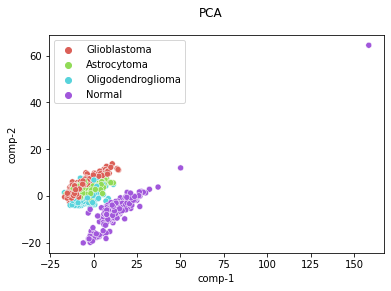

In [19]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",4 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAvsOvsN/pca.png")

In [20]:
pca.explained_variance_ratio_.sum()

0.9361464652408445

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 775 samples in 0.000s...
[t-SNE] Computed neighbors for 775 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 775 / 775
[t-SNE] Mean sigma: 3.949093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.854259
[t-SNE] KL divergence after 1000 iterations: 0.686224


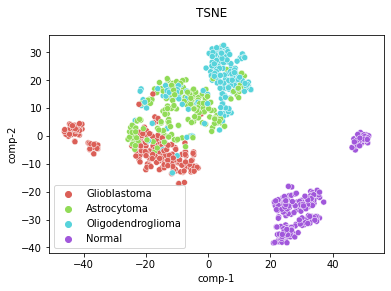

In [21]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",4 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsOvsN/tsne.png")


In [22]:
X = X_pca
result = get_metrics(X,y,3)
result.to_csv("./output/GvsAvsOvsN/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
LR,0.790968,0.646997,0.585556,0.604597
SVM,0.892903,0.902599,0.888867,0.887892
KNN,0.793548,0.501894,0.482335,0.478433
GNB,0.153548,0.233824,0.110310,0.116356


# Glioblastoma vs (A+O) vs Normal

In [23]:
#Make output Directory
os.system("mkdir ./output/GvsAOvsN")

mkdir: ./output/GvsAOvsN: File exists


256

In [24]:
X = pd.read_csv("./output/data_preprocessing/GvsAOvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAOvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

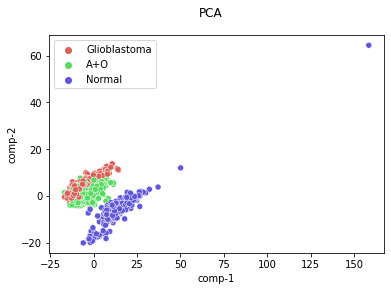

In [25]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAOvsN/pca.png")

In [26]:
pca.explained_variance_ratio_.sum()

0.9361248244219376

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 775 samples in 0.000s...
[t-SNE] Computed neighbors for 775 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 775 / 775
[t-SNE] Mean sigma: 3.947279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.970127
[t-SNE] KL divergence after 1000 iterations: 0.688156


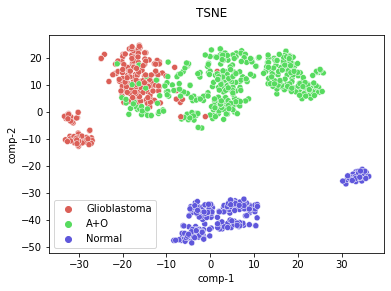

In [27]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsOvsN/tsne.png")

In [28]:
X = X_pca
result = get_metrics(X,y,4)
result.to_csv("./output/GvsAOvsN/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.922581,0.595676,0.594605,0.590822
SVM,0.967742,0.968776,0.968156,0.968091
KNN,0.908387,0.640302,0.613203,0.623904
GNB,0.223226,0.351806,0.165405,0.169836


# All vs Normal

In [29]:
#Make output Directory
os.system("mkdir ./output/GvsN")

mkdir: ./output/GvsN: File exists


256

In [30]:
X = pd.read_csv("./output/data_preprocessing/GvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

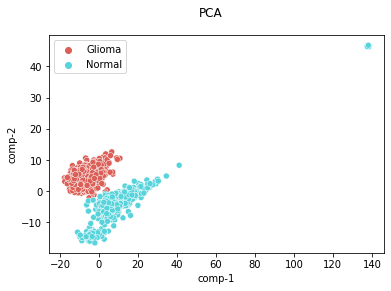

In [31]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsN/pca.png")

In [32]:
pca.explained_variance_ratio_.sum()

0.9485331510772338

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1075 samples in 0.000s...
[t-SNE] Computed neighbors for 1075 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1075
[t-SNE] Computed conditional probabilities for sample 1075 / 1075
[t-SNE] Mean sigma: 3.389265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.242805
[t-SNE] KL divergence after 1000 iterations: 0.729941


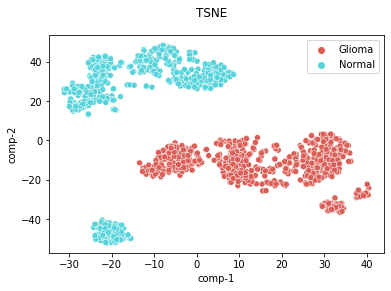

In [33]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsN/tsne.png")

In [34]:
X = X_pca
result = get_metrics(X,y,5)
result.to_csv("./output/GvsN/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,1.000000,1.000000,1.000000,1.000000
SVM,1.000000,1.000000,1.000000,1.000000
KNN,0.997209,0.899315,0.897641,0.898470
GNB,0.426047,0.499143,0.257253,0.313656


# A vs O

In [35]:
#Make output Directory
os.system("mkdir ./output/AvsO")

mkdir: ./output/AvsO: File exists


256

In [36]:
X = pd.read_csv("./output/data_preprocessing/AvsO/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/AvsO/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

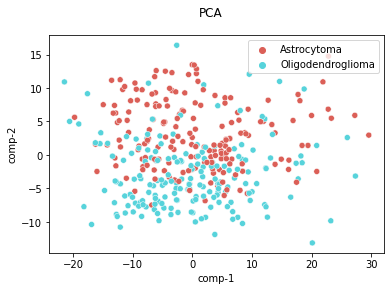

In [37]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/AvsO/pca.png")

In [38]:
pca.explained_variance_ratio_.sum()

0.9054289063838263

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 366 samples in 0.000s...
[t-SNE] Computed neighbors for 366 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 366 / 366
[t-SNE] Mean sigma: 5.586742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.221115
[t-SNE] KL divergence after 1000 iterations: 0.739322


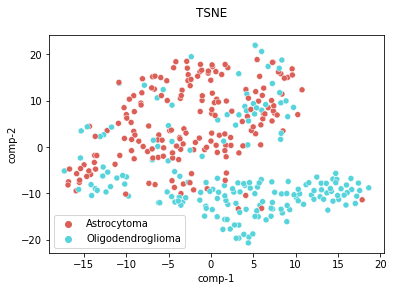

In [39]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/AvsO/tsne.png")

In [40]:
X = X_pca
result = get_metrics(X,y,6)
result.to_csv("./output/AvsO/metrics.txt")
result

,accuracy,precision,recall,f1
LR,0.753980,0.754659,0.747644,0.746466
SVM,0.819622,0.841926,0.820195,0.816629
KNN,0.797816,0.799733,0.798822,0.794539
GNB,0.513921,0.524279,0.523900,0.512215
